This notebook demonstrates practical examples of regression, classification, clustering, and dimensionality reduction using scikit-learn and visualization tools for machine learning tasks.

### Contents:

#### Exploratory Data Analysis (EDA) with the Iris Dataset:
- Load the classic Iris dataset.
- Visualize feature relationships using pair plots.
- Prepare the dataset by separating features (`X_iris`) and labels (`y_iris`).

#### Regression Example:
- Generate random data.
- Fit a linear regression model and visualize the results.

#### Supervised Learning (Classification):
- Split the Iris dataset into training and test sets.
- Train a Gaussian Naive Bayes classifier.
- Evaluate classification accuracy.

#### Unsupervised Learning (Dimensionality Reduction):
- Apply Principal Component Analysis (PCA) to the Iris dataset.
- Visualize the reduced dimensions.

#### Clustering:
- Use Gaussian Mixture Models (GMM) to cluster the Iris data.
- Visualize clusters in PCA-reduced space.

#### Handwritten Digits Dataset:
- Load and visualize the scikit-learn digits dataset.
- Apply Isomap for dimensionality reduction.
- Train a Gaussian Naive Bayes classifier on the digits data.
- Evaluate accuracy and visualize the confusion matrix.
- Display correct and incorrect predictions on digit images.


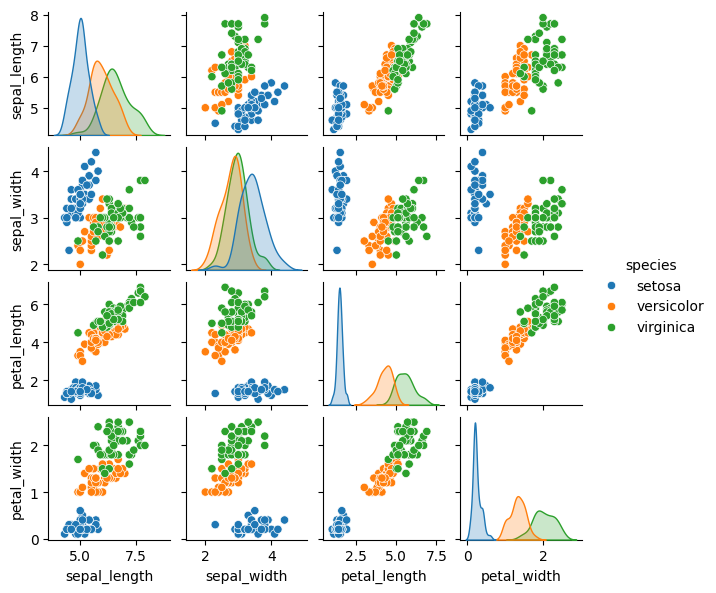

(150,)

In [ ]:

# Lectures Machine Learning and Data science
# Run Example of the book: Jake VanderPlas, Python Data Science Handbook, O'REILLY
# Python, Machine Learning, Ch 38, Introducing Scikit-Learn, Page 394

# Saviz

import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
iris.head()
sns.pairplot(iris, hue='species', height=1.5)
plt.show()
X_iris = iris.drop('species', axis=1); X_iris.shape # (150, 4)
y_iris = iris['species']; y_iris.shape # (150,)



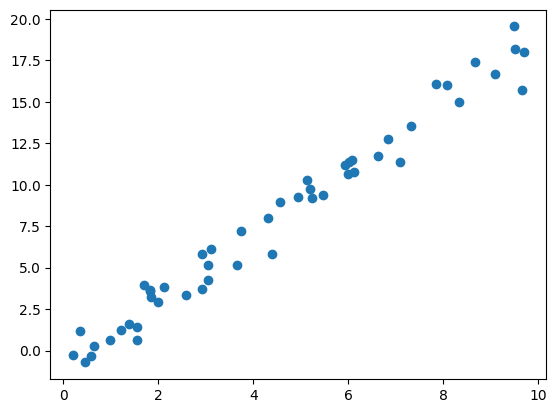

In [2]:
# Regression, Random Data set 
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)


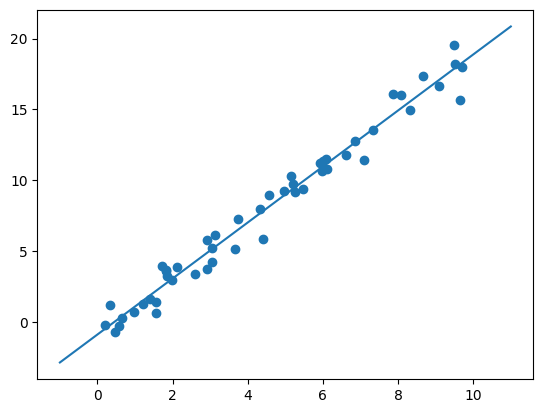

In [3]:
# Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
X.shape
model.fit(X, y)
model.coef_ # array([1.9776566])
model.intercept_ # -0.903310725531111

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()



In [4]:
# Supervised Learning Example: Iris Classification
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)




0.9736842105263158

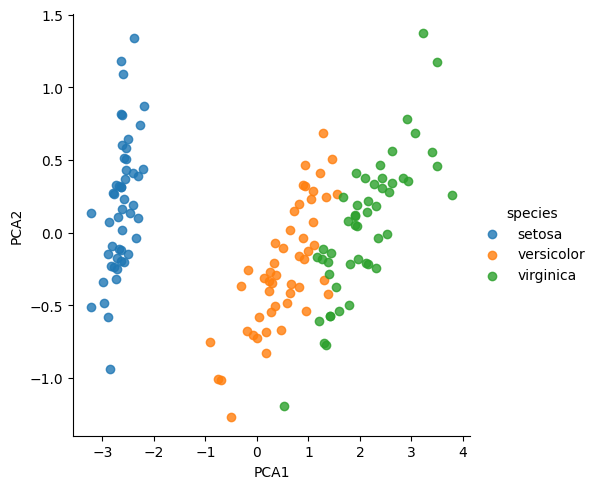

In [5]:

# Unsupervised Learning Example: Iris Dimensionality reduction, Principle Component Analysis (PCA)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # 1. choose model class
model = PCA(n_components=2) # 2. instantiate model
model.fit(X_iris) # 3. fit model to data
X_2D = model.transform(X_iris) # 4. transform the data
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)
plt.show()

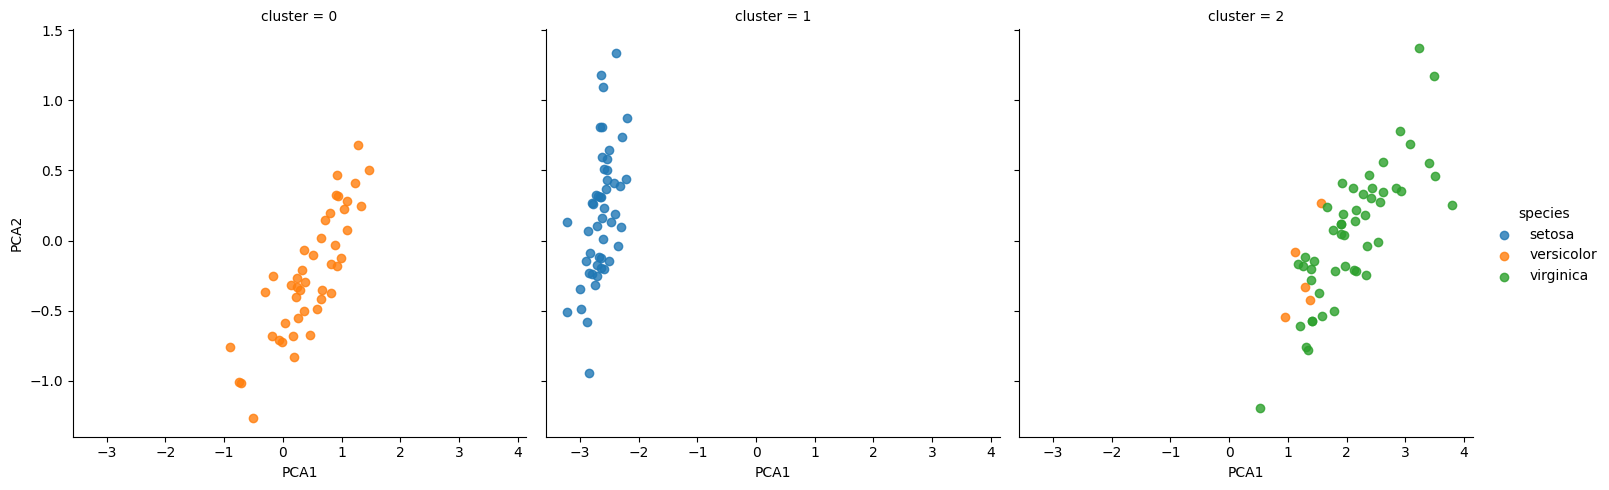

In [6]:
# Unsupervised Learning Example: 
# Iris Clustering, Gaussian mixture model (GMM), KMeans Clustering
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture # 1. choose model class
model = GaussianMixture(n_components=3,
covariance_type='full') # 2. instantiate model
model.fit(X_iris) # 3. fit model to data
y_gmm = model.predict(X_iris) # 4. determine
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False);
plt.show()



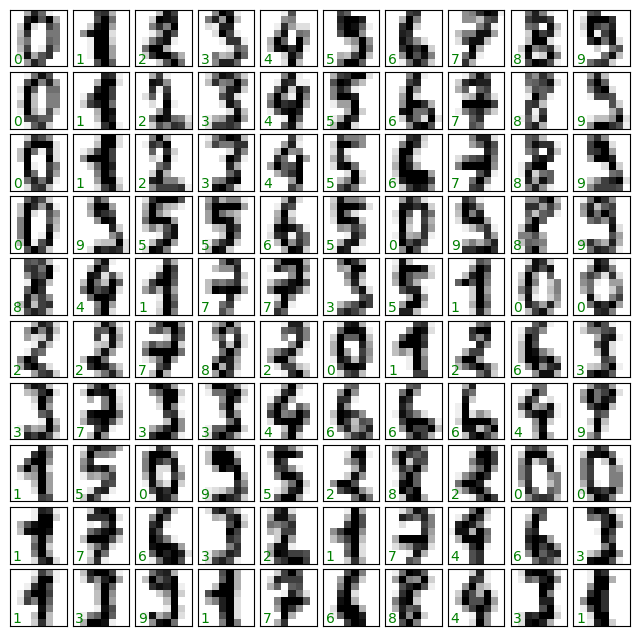

(1797,)

In [7]:
# ----------------------------------------

# Python, Application: Exploring Handwritten Digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
 ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
 ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green') 


plt.show()
X = digits.data
X.shape
y = digits.target
y.shape # (1797, 2)



/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 10)


/var/folders/4q/p59t2ccd40zgg62r0lz1s6sc0000gn/T/ipykernel_36846/960096262.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('viridis', 10))


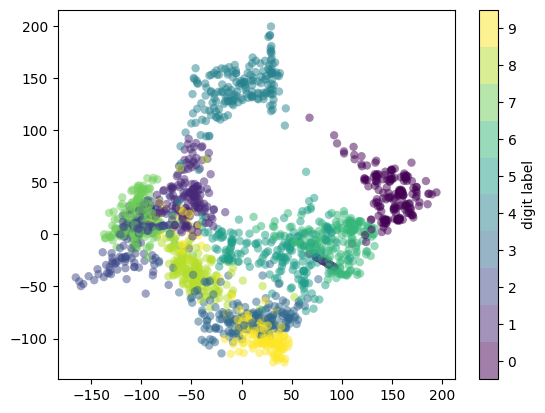

In [8]:
# Unsupervised Learning Example: Dimensionality Reduction
from sklearn.manifold import Isomap
iso = Isomap(n_components=10)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);
plt.show()







In [9]:


# Classification on Digits, Gaussian naive Bayes model
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # 0.83333



0.8333333333333334

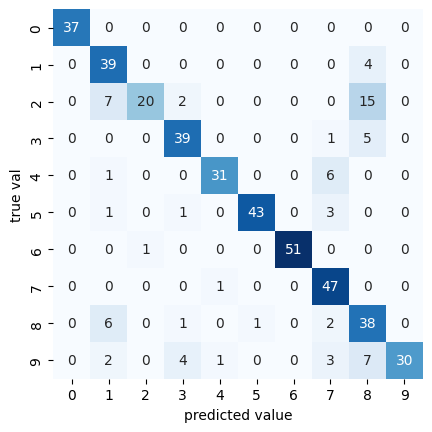

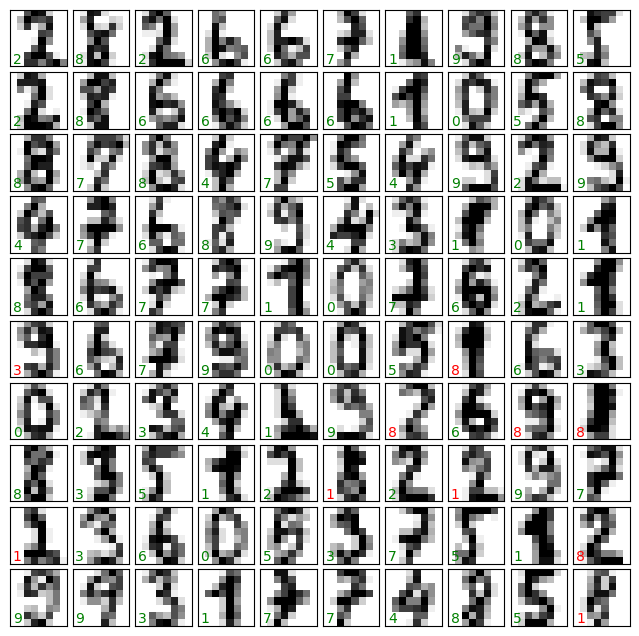

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true val');
plt.show()
# ---------------------------------------------
# use green for correct labels and red for incorrect labels
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
  ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')
  

plt.show()